In [2]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")
X = dataset["data"]
y = dataset["target"]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [36]:
import numpy as np
import random as rnd
import math

class MyRandomForestClassifier():
    
    def __init__(self, n_estimators, max_features):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.decision_trees = []
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        self.decision_trees = []
        features = [i for i in range(X.shape[1])]        
        y.shape = (y.shape[0],1)
        X_y_combined = np.concatenate((X,y), axis = 1)
        
        for i in range(self.n_estimators):
            selected_features = rnd.sample(features, self.max_features)
            X_y_extracted = np.array(rnd.sample(list(X_y_combined), math.ceil(X.shape[0]*0.6)))
            X_extracted = X_y_extracted[:,:-1][:,selected_features]
            y_extracted = X_y_extracted[:,-1:]
            tree = DecisionTreeClassifier().fit(X_extracted, y_extracted)
            self.decision_trees.append((tree, selected_features))
            
        return self
    
    def predict(self, X):
        def most_frequent(List): 
            return max(set(List), key = List.count)
        
        predictions = []
        y_pred = []
        
        for tree,features in self.decision_trees:
            single_pred = tree.predict(X[:,features])
            predictions.append(single_pred)
        predictions = np.array(predictions)
        for i in range(predictions.shape[1]):
            single_obs_preds = list(predictions[:,i])
            y_pred.append(most_frequent(single_obs_preds))
        
        return y_pred
            
            

In [37]:
from sklearn.ensemble import RandomForestClassifier

B = math.ceil(math.sqrt(X.shape[1]))
my_results = []
sklearn_results = []

for n_trees in range(10,110,10):
    
    my_rfclf = MyRandomForestClassifier(n_trees, B).fit(X_train,y_train)
    my_y_pred = my_ rfclf.predict(X_test)
    my_accuracy = accuracy_score(y_test, my_y_pred)
    my_results.append(my_accuracy)
    
    y_train.shape = (y_train.shape[0],)
    rfclf = RandomForestClassifier(n_estimators= n_trees,max_features= B).fit(X_train,y_train)
    y_pred = rfclf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    sklearn_results.append(accuracy)

Accuracy with 100 trees for each forest: 0.95


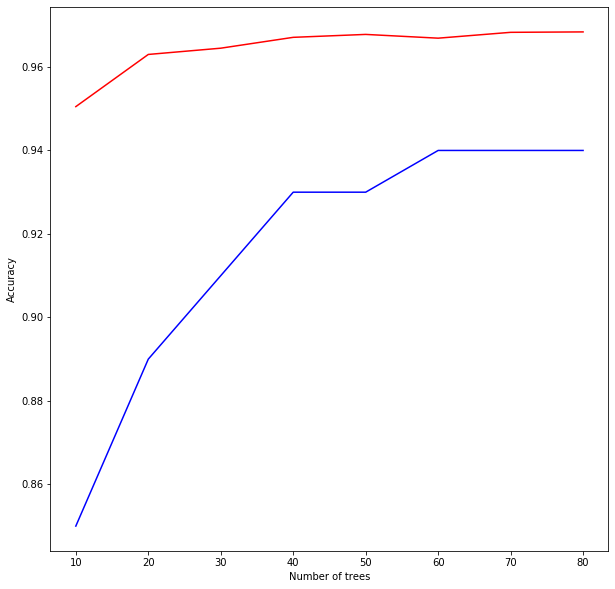

In [68]:
import matplotlib.pyplot as plt

x = [10,20,30,40,50,60,70,80,90,100]
fig,ax = plt.subplots(figsize= (10,10))
ax.plot(x, my_results , 'b')
ax.plot(x, sklearn_results, 'r')
ax.set_xlabel("Number of trees")
ax.set_ylabel("Accuracy")
plt.show()

In [40]:
my_rfclf = MyRandomForestClassifier(100, B).fit(X_train,y_train)

In [84]:
def get_feature_importances(rfclf):
    feature_importances_list = np.full(X.shape[1],0, dtype=float)
    
    for tree,selected_features in rfclf.decision_trees:
        feature_importances = tree.feature_importances_
        for i in range(len(selected_features)):
            feature = selected_features[i]
            feature_importances_list[feature] += feature_importances[i]

    feat_imp_sum = sum(feature_importances_list)
    feature_importances_list = [x/feat_imp_sum for x in feature_importances_list]
    return feature_importances_list

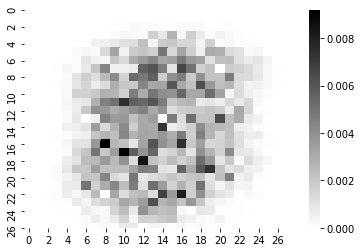

In [87]:
import seaborn as sns

feature_importances = get_feature_importances(my_rfclf)
sns.heatmap(np.reshape(feature_importances, (28,28)), cmap='binary') 

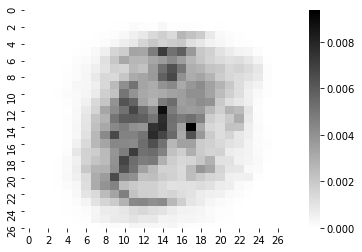

In [89]:
rfclf = RandomForestClassifier(n_estimators= 100,max_features= B).fit(X_train,y_train)
feature_importances = rfclf.feature_importances_
sns.heatmap(np.reshape(feature_importances, (28,28)), cmap='binary') 